In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1. / (1 + numpy.exp(-x))

def loss_function(Y, T):
    return numpy.mean((Y - T) ** 2)
                                                   
def forward(X, W1, W2):
    H = sigmoid(W1.dot(X))
    H[0,:] = 1. # bias
    return W2.dot(H), H

def gradient_layer_1(X, W, H, Y, T):
    tmp = W.T.dot(Y - T) * H * (1 - H)
    return tmp.dot(X.T) / X.shape[1]

def gradient_layer_2(H, Y, T):
    return (Y-T).dot(H.T) / Y.shape[1]

def descent(X, T, W1, W2, eta):
    Y, H = forward(X, W1, W2)
    loss = loss_function(Y, T)
    W1 -= eta * gradient_layer_1(X, W2, H, Y, T)
    W2 -= eta * gradient_layer_2(H, Y, T)
    return W1, W2, loss 
                             
def batch(X, T, B):
    D = numpy.vstack((X, T))
    numpy.random.shuffle(D.T)
    for i in range(0, X.shape[1], B):
        sample = D[:,i:i+B]
        if (sample.shape[1] == B): # ignore the rest if X mod != 0
            yield sample[:-3], sample[-3:]
            
def stochastic_gradient_descent(X, T, W1, W2, B, eta, epochs):
    loss_arr = []
    for epoch in range(epochs):
        batches = batch(X, T, B)
        for b in batches: # call the generator, returns a tuple with X and T values
            W1, W2, J = descent(b[0], b[1], numpy.copy(W1), numpy.copy(W2), eta)
        loss_arr.append(J)
    return W1, W2, loss_arr

def gradient_descent(X, T, W1, W2, eta, epochs):
    loss_arr = []
    for epoch in range(epochs):
        W1, W2, J = descent(X, T, numpy.copy(W1), numpy.copy(W2), eta)
        loss_arr.append(J)
    return W1, W2, loss_arr

In [3]:
# Task 4: prepare dataset
df = pandas.read_csv("data/student-mat.csv", sep=";")
drop_columns = ["Mjob", "Fjob", "reason", "guardian"]
df.drop(drop_columns, inplace=True, axis=1)

# convert to binary
df["school"].replace({"GP": -1, "MS": 1}, inplace=True)
df["sex"].replace({"F": -1, "M": 1}, inplace=True)
df["address"].replace({"U": -1, "R": 1}, inplace=True)
df["famsize"].replace({"GT3": -1, "LE3": 1}, inplace=True)
df["Pstatus"].replace({"A": -1, "T": 1}, inplace=True)
df["schoolsup"].replace({"no": -1, "yes": 1}, inplace=True)
df["famsup"].replace({"no": -1, "yes": 1}, inplace=True)
df["paid"].replace({"no": -1, "yes": 1}, inplace=True)
df["activities"].replace({"no": -1, "yes": 1}, inplace=True)
df["nursery"].replace({"no": -1, "yes": 1}, inplace=True)
df["higher"].replace({"no": -1, "yes": 1}, inplace=True)
df["internet"].replace({"no": -1, "yes": 1}, inplace=True)
df["romantic"].replace({"no": -1, "yes": 1}, inplace=True)

# convert all values to float
df = df.astype('float128')

# init input & target
T = df[df.columns[-3:]].to_numpy()
T = T.T
X = df[df.columns[:-3]].to_numpy()
X = numpy.vstack((numpy.ones(X.shape[0]),X.T)) # add bias

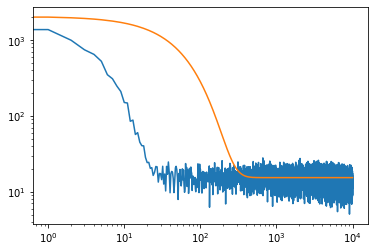

In [4]:
# main script

# hyperparameters
eta = 0.0001
B = 32
epochs = 10000
k = 100

# init weights
W1 = numpy.random.uniform(size=(k+1,X.shape[0])) # first layer weights
W2 = numpy.random.uniform(size=(T.shape[0],k+1)) # second layer weights

# run stochastic gradient descent
W1_sgd, W2_sgd, loss_arr_sgd = stochastic_gradient_descent(X, T, W1.copy(), W2.copy(), B, eta, epochs)
    
# run gradient descent
W1_gd, W2_gd, loss_arr_gd = gradient_descent(X, T, W1.copy(), W2.copy(), eta, epochs)
    
# plot loss functions for stochastic gradient descent and gradient descent
x = numpy.arange(0, epochs)
plt.loglog(x,loss_arr_sgd,'-')
plt.loglog(x,loss_arr_gd,'-')
plt.show()